# Analysis of movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyze movie data from The Movie Database (TMDb). More specifically we will analyze in how far the revenue is correlated to the budget, popularity score and the voting score. Additionally, we will determine which genres are the most popular and if a high popularity score leads to an increase in the revenue/budget ratio.


In [1]:
# import modules
import numpy as np
import pandas as pd
from pandas import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
# make sure that visualizations pop up in jupyter notebook
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load data, check for cleanliness and trim and clean the dataset for analysis.

### General Properties

In [2]:
movies_df = pd.read_csv('tmdb_movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We analyze the dataset with the built-in function .describe() to better understand the data.

In [3]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In the following it becomes apparent that some values are missing for certain columns such as 'imdb_id', 'cast', 'homepage', etc.

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We will do a check for zero values. 

In [5]:
(movies_df == 0).astype(int).sum(axis=0)

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

We will check for duplicated rows. 

In [6]:
movies_df.duplicated()[movies_df.duplicated() == True]

2090    True
dtype: bool

### Data Cleaning: Drop unnecessary columns, delete rows with missing / zero values.

We will delete the duplicates and check the result.

In [7]:
movies_df = movies_df.drop_duplicates()

In [8]:
movies_df.duplicated()[movies_df.duplicated() == True]

Series([], dtype: bool)

In [9]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Once again, we will check for zero values.

In [10]:
(movies_df == 0).astype(int).sum(axis=0)

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

The columns 'revenue_adj' and 'budget_adj' are the core of the analysis. Therefore, we do not want to manipulate the dataset and decide that 3855 datapoints are still sufficient for our analysis purposes. Rows containing zero values in these columns will be excluded.

In [11]:
movies_df = movies_df[(movies_df['revenue_adj'] != 0) & (movies_df['budget_adj'] != 0)]

- We drop columns that are very specific for each movie: 'id', 'imdb_id', 'release_date', 'runtime', 'vote_count', 'release_year', 'original_title'.

- Additionally, we drop string columns with missing values: 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'.
- The columns 'budget', 'revenue' are dropped as we will use the columns 'budget_adj', 'revenue_adj' for our analysis. The columns 'budget_adj' and 'revenue_adj' are better as they ensure comparability between the movies.


In [12]:
movies_df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', \
                'production_companies', 'release_date', 'original_title', 'budget', 'revenue', 'runtime', \
                'vote_count', 'release_year'], axis = 1, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


In order to strengthen our understanding of the remaining data we will look at the corresponding histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF95C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E661390>]], dtype=object)

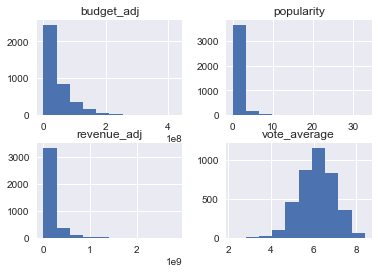

In [13]:
movies_df.hist()

The distributions for the budget_adj, popularity and revenue_adj are all positively skewed. The vote_average distribution does not show a strong skew.

### Q1: What kinds of properties are associated with movies that have high revenues?

We will analyze the following:
- Dependent variable: 'revenue_adj'
- Independent variables: 'budget_adj', 'popularity', 'vote_average'

We are interested in the correlation between these variables.

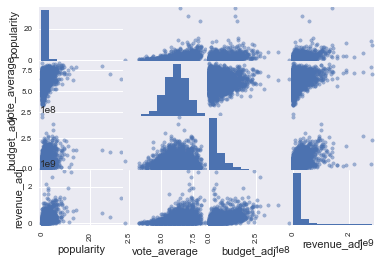

In [14]:
# Display scatter_matrix
scatter_matrix(movies_df[['popularity', 'vote_average', 'budget_adj', 'revenue_adj']])
plt.show()

The scatter matrix gives us a first overview of the correlations between the variables.

In the following we will group by the independet variables 'budget_adj', 'popularity' and 'vote_average'. Subsequently, we will calculate the correlation coefficient Pearson's r and visualize the correlation in scatter plots.

In [15]:
# Groupby 'budget_adj'
# Calculate Pearson's r: 'budget_adj', 'revenue_adj'
budget_grouped_data = movies_df.groupby(['budget_adj'], as_index=False).mean()
r_budget_revenue = pearsonr(budget_grouped_data['budget_adj'], budget_grouped_data['revenue_adj'])
print (r_budget_revenue[0])

0.573107582757


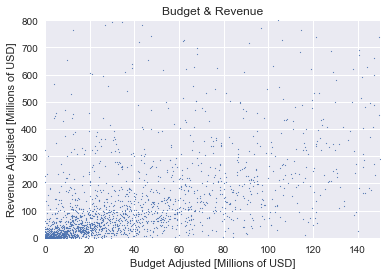

In [16]:
plt.title('Budget & Revenue')
plt.xlabel('Budget Adjusted [Millions of USD]')
plt.ylabel('Revenue Adjusted [Millions of USD]')
xs = budget_grouped_data['budget_adj']/(10**6)
ys = budget_grouped_data['revenue_adj']/(10**6)
plt.xlim(0, 150)
plt.ylim(0, 800)
plt.scatter(xs, ys, s= 0.8)
plt.show()

This scatterplot shows that the variables Budget Adjusted and Revenue Adjusted are correlated with each other.

In [17]:
# Groupby 'populartiy'
# Calculate Pearson's 'popularity', 'revenue_adj'
popularity_grouped_data = movies_df.groupby(['popularity'], as_index=False).mean()
r_pop_revenue = pearsonr(popularity_grouped_data['popularity'], popularity_grouped_data['revenue_adj'])
print (r_pop_revenue[0])

0.546921768471


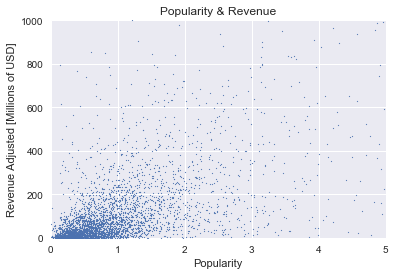

In [18]:
plt.title('Popularity & Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue Adjusted [Millions of USD]')
xs = popularity_grouped_data['popularity']
ys = popularity_grouped_data['revenue_adj']/(10**6)
plt.xlim(0,5)
plt.ylim(0, 1000)
plt.scatter(xs, ys, s= 0.8)
plt.show()

This scatterplot shows that the variables Popularity and Revenue Adjusted are correlated with each other.

In [19]:
# Groupby 'vote_average'
# Calculate Pearson's 'vote_average', 'revenue_adj'
vote_grouped_data = movies_df.groupby(['vote_average'], as_index=False).mean()
r_vote_revenue = pearsonr(vote_grouped_data['vote_average'], vote_grouped_data['revenue_adj'])
print (r_vote_revenue[0])

0.607656178273


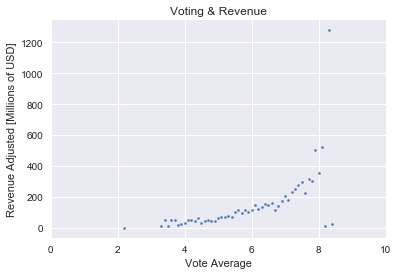

In [20]:
plt.title('Voting & Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue Adjusted [Millions of USD]')
xs = vote_grouped_data['vote_average']
ys = vote_grouped_data['revenue_adj']/(10**6)
plt.xlim(0,10)
plt.scatter(xs, ys, s=5)
plt.show()

This scatterplot shows that the variables Vote Average and Revenue Adjusted are correlated with each other.

We will combine the analysis for the independent variables and compare their correlations.

In [21]:
a = budget_grouped_data['revenue_adj']/(10**6)
b = popularity_grouped_data['revenue_adj']/(10**6)
c = vote_grouped_data['revenue_adj']/(10**6)

grouped_values = pd.concat([a,b,c], axis=1)
grouped_values.columns = ['Budget Adjusted', 'Popularity', 'Voting']


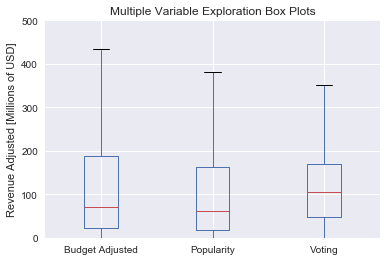

In [22]:
grouped_values.boxplot()
plt.title('Multiple Variable Exploration Box Plots')
plt.ylabel('Revenue Adjusted [Millions of USD]')
plt.ylim(0, 500)
plt.show()

This diagram shows that the independent variables Budget Adjusted, Popularity and Voting are similar with each other in terms of correlation with the Revenue Adjusted.

### Q2: Which genres are the most popular?

The following steps will clean up the data once again to properly split the genres. We decided to leave this cleaning procedure in this segment as it is specifically required for this question.

In [23]:
movies_df.head()

,popularity,genres,vote_average,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09


In [24]:
# This procedure was copied from Stack Overflow 
# Source: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [25]:
movies_df = tidy_split(movies_df, 'genres')

In [26]:
movies_df.head()

,popularity,genres,vote_average,budget_adj,revenue_adj
0,32.985763,Action,6.5,1.379999e+08,1.392446e+09
0,32.985763,Adventure,6.5,1.379999e+08,1.392446e+09
0,32.985763,Science Fiction,6.5,1.379999e+08,1.392446e+09
0,32.985763,Thriller,6.5,1.379999e+08,1.392446e+09
1,28.419936,Action,7.1,1.379999e+08,3.481613e+08


For comparison reason, we will first look at the overall popularity histogram. Afterwards, the popularity will be analyzed per genre.

Average popularity: 1.26213952965


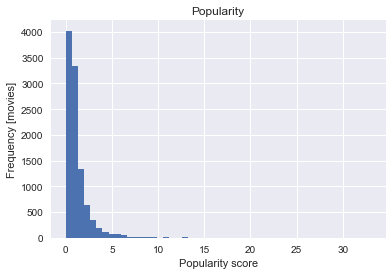

In [27]:
print ('Average popularity: ' + str(movies_df['popularity'].mean()))
movies_df['popularity'].hist(bins = 50)
plt.title('Popularity')
plt.xlabel('Popularity score')
plt.ylabel('Frequency [movies]')
plt.show()

Since the distribution is strongly positively skewed we will take a look at all the movies popularities that do not exceed a score of four.

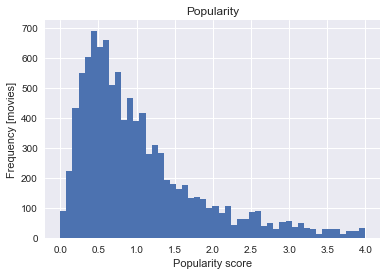

In [28]:
movies_df['popularity'][movies_df['popularity']<4].hist(bins = 50)
plt.title('Popularity')
plt.xlabel('Popularity score')
plt.ylabel('Frequency [movies]')
plt.show()


As above, this histogram also underlines the positive skew in the popularity distribution.

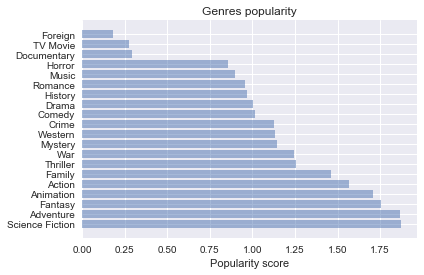

In [29]:
genres_grouped_data = movies_df.groupby(['genres'], as_index=False).mean().sort_values(['popularity'], ascending=False).reset_index()
genres = genres_grouped_data['genres']
y_pos = np.arange(len(genres))
popularity = genres_grouped_data['popularity']

plt.barh(y_pos, popularity, align='center', alpha=0.5)
plt.yticks(y_pos, genres)
plt.xlabel('Popularity score')
plt.title('Genres popularity')
plt.show()

This bar chart illustrates that Science Fiction, Adventure and Fantasy are the most popular genres.

### Q3: Do the TOP 3 genres in terms of popularity score have better revenue/budget ratios than the average? 

In the next steps we will determine the revenue/budget ratios for all genres and for the TOP 3 genres.

In [30]:
def calculate_ratio(revenue, budget):
    return revenue/budget

In [31]:
ratio_best_genre = calculate_ratio(genres_grouped_data['revenue_adj'][0], genres_grouped_data['budget_adj'][0])
ratio_second_best_genre = calculate_ratio(genres_grouped_data['revenue_adj'][1], genres_grouped_data['budget_adj'][1])
ratio_third_best_genre = calculate_ratio(genres_grouped_data['revenue_adj'][2], genres_grouped_data['budget_adj'][2])
print (ratio_best_genre, ratio_second_best_genre, ratio_third_best_genre)

(3.080793888325148, 3.3401642037984107, 3.1156591504716187)


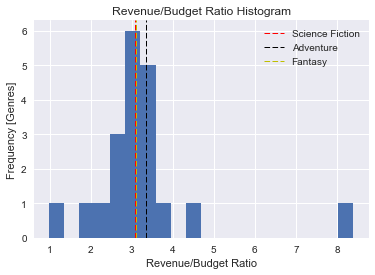

In [32]:
ratio_series = calculate_ratio(genres_grouped_data['revenue_adj'], genres_grouped_data['budget_adj'])
ratio_series.hist(bins=20)
plt.title('Revenue/Budget Ratio Histogram')
plt.xlabel('Revenue/Budget Ratio')
plt.ylabel('Frequency [Genres]')
plt.axvline(ratio_best_genre, color='r', linestyle='dashed', linewidth=1, label = str(genres_grouped_data['genres'][0]))
plt.axvline(ratio_second_best_genre, color='k', linestyle='dashed', linewidth=1, label = str(genres_grouped_data['genres'][1]))
plt.axvline(ratio_third_best_genre, color='y', linestyle='dashed', linewidth=1, label = str(genres_grouped_data['genres'][2]))
plt.legend(loc='upper right')
plt.show()

This Revenue/Budget Ratio Histogram makes clear that genres with a higher popularity score do not tend to have better revenue/budget ratios.

<a id='conclusions'></a>
## Conclusions


### Limitations

- When it comes to limitations we need to point out that we deleted a lot of datapoints containing zero values in the columns 'budget_adj' and 'revenue_adj'. We did not want to fill these values because this would have decreased the accurateness of our analysis dramatically. 
- Additionally, we deleted duplicates and rows with missing values (NAN values). 
- Finally, we could only take into account approximately one third of TMDb for our analysis. 
- These data are not sufficient to prove our findings. It would be necessary to challenge our findings with a new extended dataset and determine if the findings are still valid.

### Q1: What kinds of properties are associated with movies that have high revenues?

- The analysis has shown that the revenues are positively correlated with all independent variables: Budget, popularity and voting scores. The pearson's r values were all in a range of 0.55 to 0.61 which demonstrates a moderate positive relationship between these variables and the revenues of the movies.
- The scatter matrices visually confirmed the existence of this correlation. However, it also became clear that the correlation amongst these variables is neither strong nor perfect. 
- The box plot diagram visualized that the there is a positive correlation of the independent variables budget adjusted, popularity and voting together on the revenue adjusted variable.
- We cannot imply that a movie earns more money if we e.g. increase the budget or increase the popularity of the movie. The analysis only shows that there is a tendency. 

### Q2: Which genres are the most popular?

- We analyzed the popularity score in order to figure out which genres are the most popular. 
- The average popularity score for all movies is 1.26. The histograms clearly showed that the distribution of popularity score is positively skewed.
- The most popular genres (all popularity scores > 1.75) are Science Fiction, Adventure and Fantasy.

### Q3: Do the TOP 3 genres in terms of popularity score have better revenue/budget ratios than the average? 

- We analyzed the revenue/budget ratios for all genres and for each of the TOP 3 genres.
- The Revenue/Budget Ratio Histogram illustrated that genres with a higher popularity score do not tend to have better revenue/budget ratios. They are all centered around the mean.